# Lab 2: RNA coarse grained molecule 3d plot 🪢

Since the coarse grained RNA molecule has been defined and demonstratd previously, out goal in this notebook is to portray it in 3D. We will use the `matplotlib` library to plot the molecule in 3D.

To deal with the multiple atom conformations of a particular position, the atom with highest occupancy will be chosen as representative (`max_occupancy_atom` function). By default, teh representative of each residue will be the C alpha atom of highest occupancy.

For that several helper functions has been implemented:

- `max_occupancy_atom`: takes a list of atoms and returns the atom with highest occupancy 
- `chain_to_atom_list`: takes a chain and returns a list of atoms
- `atoms_to_coordinates`: takes a list of atoms and returns a list of coordinates (3-tuples of floats)
- `get_chain_residue_coordinates`: takes a chain and returns a list of coordinates (3-tuples of floats) of the representative atoms of each residue
- `plot_chain_residue_coordinates`: takes a chain and plots the representative atoms of each residue in 3D

The molecule to be plotted is the RNA molecule from the previous lab as example (PDB ID: 7AEF)

## Set up

In [1]:
import os,sys
sys.path.append(os.path.abspath('../src'))

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from IO.RNA_IO import RNA_IO
from utils import pathify_pdb

RF00162


Functions to extract the coordinates directly from the chain

In [72]:
# -- useful functionalities

def max_occupancy_atom(atoms_of_res):
    '''takes a list of atoms of different conformations (type Atom) and returns the atom with the highest occupancy'''
    max_occ_atom=None
    max_occ=0
    for atom in atoms_of_res:
        if atom.occupancy>max_occ:
            max_occ=atom.occupancy
            max_occ_atom=atom
    return max_occ_atom

def chain_to_atom_list(chain):
    '''takes a chain and returns a list of atoms'''
    res_list=chain.get_residues()
    atom_list=[]
    for _ in range(1,1+len(res_list)):
        res=res_list[_]
        atoms_of_res=list(res.get_atoms().values())
        atom_of_res=max_occupancy_atom(atoms_of_res)
        atom_list.append(atom_of_res)
    return atom_list

def atoms_to_coordinates(atoms):
    '''takes a list of Atom objects and retuns a list of 3-tuples of coordinates'''
    coordinates=[]
    for atom in atoms:
        x,y,z=atom.x,atom.y,atom.z
        coordinates.append((x,y,z))
    return coordinates

def chain_to_coordinates(chain):
    '''takes a chain and returns a list of 3-tuples of coordinates'''
    atom_list=chain_to_atom_list(chain)
    return atoms_to_coordinates(atom_list)

def get_chain_residue_coordinates(chain):
    '''
    takes a Chain object and returns a (contiguous) list of residues coordinates in 3-tuple format -> [(x1,y1,z1),...,(xn,yn,zn)]

    _note, res coordinates are in fact c alpha coordinates_
    '''
    res_list=chain.get_residues()
    res_coords=[]
    for _ in range(1,len(res_list)+1):
        res=res_list[_]
        c_atom=list(res.get_atoms().values())
        res_coords.append((c_atom[0].x,c_atom[0].y,c_atom[0].z))
    return res_coords

import plotly.graph_objects as go

def plot_chain_residue_coordinates(res_coords):
    """
    Plots the residue coordinates of a chain in 3D using Plotly.
    
    :param res_coords: List of (x, y, z) tuples representing residue coordinates
    """
    x, y, z = zip(*res_coords)
    
    fig = go.Figure()
    
    # Add trace for the backbone
    fig.add_trace(go.Scatter3d(
        x=x, y=y, z=z,
        mode='marker',
        # marker=dict(size=5, color='blue', opacity=0.8),
        marker=dict(width=2, color=z, colorscale='Viridis', opacity=0.8),
        name='Backbone'
    ))

    # line=dict(
    #     width=2, 
    #     color=z,  # Color based on z values
    #     colorscale='Viridis'  # Viridis for line color
    # ), 
    
    # Layout settings
    fig.update_layout(
        title='3D Visualization of Chain Residue Coordinates',
        scene=dict(
            xaxis_title='X Coordinate',
            yaxis_title='Y Coordinate',
            zaxis_title='Z Coordinate'
        ),
        margin=dict(l=0, r=0, b=0, t=40)
    )
    
    fig.show()
    return fig

def plot_molecule(rna_molecule, name=None, colormap='viridis'):
    colormap_=plt.get_cmap(colormap)
    models=list(rna_molecule.get_models().values())

    colors=[colormap_(i/len(models)) for i in range(len(models))]

    fig = go.Figure()


    for i in range(len(models)):
        model = models[i]
        c=colors[i]
        chains = list(model.get_chains().values())

        for chain in chains:
            res_coords = get_chain_residue_coordinates(chain)

            x, y, z = zip(*res_coords)

            fig.add_trace(go.Scatter3d(
            x=x, y=y, z=z,
            mode='markers+lines',
            marker=dict(size=2, color=f'rgba({c[0]},{c[1]},{c[2]},{c[3]})', opacity=0.8),
            line=dict(width=2, color=f'rgba({c[0]},{c[1]},{c[2]},{c[3]})'),
            name='Backbone'
        ))
        
    fig.update_layout(
        scene=dict(
            xaxis_title='X Coordinate',
            yaxis_title='Y Coordinate',
            zaxis_title='Z Coordinate'
        ),
        margin=dict(l=0, r=0, b=0, t=40),
        # dont put legend
        showlegend=False,
        title=name
    )
    
    fig.show()
    return fig
            



In [73]:
pdb_path=pathify_pdb('1r7w')
cg_mol=rna_io.read(pdb_path, "PDB", coarse_grained=True, atom_name="C1'") #atom_name is optional, default is "C1'"

fig=plot_molecule(cg_mol, name='NMR CoarseGrained 1r7w backbone')

# save html
fig.write_html('1r7w_cg_backbone.html')

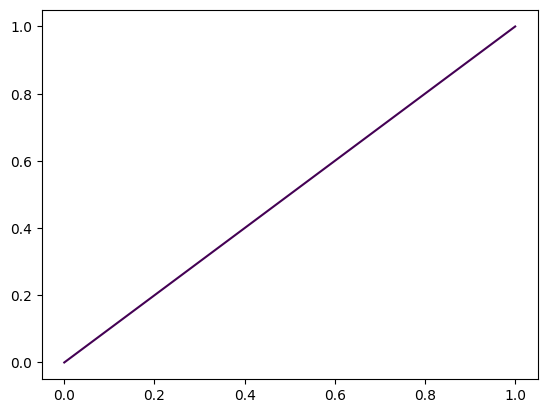

In [48]:
colormap=plt.get_cmap('viridis')
# make it a list of length k
chains=[1]
colors=[colormap(i/len(chains)) for i in range(len(chains))]

# plot these colors to show them
fig, ax = plt.subplots()
for i in range(len(chains)):
    ax.plot([0,1],[0,1],color=colors[i],label=str(i))

## Example from chain A of 7eaf:

### reading file

In [39]:
rna_io=RNA_IO()
pdb_path=pathify_pdb('7EAF')
cg_mol=rna_io.read(pdb_path, "PDB", coarse_grained=True, atom_name="C1'") #atom_name is optional, default is "C1'"
mol=rna_io.read(pdb_path, "PDB", coarse_grained=False) #atom_name is optional, default is "C1'"


> note: Species with this name already exists, will return the same instance
RNA_Molecule 7EAF already exists in the species CALDANAEROBACTER SUBTERRANEUS SUBSP. TENGCONGENSIS; not added again
> note: Species with this name already exists, will return the same instance
RNA_Molecule 7EAF already exists in the species CALDANAEROBACTER SUBTERRANEUS SUBSP. TENGCONGENSIS; not added again


### retrieving chain A

In [4]:
model_0=cg_mol.get_models()[0]
cg_chainA=model_0.get_chains()['A']

### plotting

In [30]:
res_coords=get_chain_residue_coordinates(cg_chainA)
plot_chain_residue_coordinates(res_coords)

ValueError: Invalid property specified for object of type plotly.graph_objs.scatter3d.Marker: 'width'

Did you mean "cauto"?

    Valid properties:
        autocolorscale
            Determines whether the colorscale is a default palette
            (`autocolorscale: true`) or the palette determined by
            `marker.colorscale`. Has an effect only if in
            `marker.color` is set to a numerical array. In case
            `colorscale` is unspecified or `autocolorscale` is
            true, the default palette will be chosen according to
            whether numbers in the `color` array are all positive,
            all negative or mixed.
        cauto
            Determines whether or not the color domain is computed
            with respect to the input data (here in `marker.color`)
            or the bounds set in `marker.cmin` and `marker.cmax`
            Has an effect only if in `marker.color` is set to a
            numerical array. Defaults to `false` when `marker.cmin`
            and `marker.cmax` are set by the user.
        cmax
            Sets the upper bound of the color domain. Has an effect
            only if in `marker.color` is set to a numerical array.
            Value should have the same units as in `marker.color`
            and if set, `marker.cmin` must be set as well.
        cmid
            Sets the mid-point of the color domain by scaling
            `marker.cmin` and/or `marker.cmax` to be equidistant to
            this point. Has an effect only if in `marker.color` is
            set to a numerical array. Value should have the same
            units as in `marker.color`. Has no effect when
            `marker.cauto` is `false`.
        cmin
            Sets the lower bound of the color domain. Has an effect
            only if in `marker.color` is set to a numerical array.
            Value should have the same units as in `marker.color`
            and if set, `marker.cmax` must be set as well.
        color
            Sets the marker color. It accepts either a specific
            color or an array of numbers that are mapped to the
            colorscale relative to the max and min values of the
            array or relative to `marker.cmin` and `marker.cmax` if
            set.
        coloraxis
            Sets a reference to a shared color axis. References to
            these shared color axes are "coloraxis", "coloraxis2",
            "coloraxis3", etc. Settings for these shared color axes
            are set in the layout, under `layout.coloraxis`,
            `layout.coloraxis2`, etc. Note that multiple color
            scales can be linked to the same color axis.
        colorbar
            :class:`plotly.graph_objects.scatter3d.marker.ColorBar`
            instance or dict with compatible properties
        colorscale
            Sets the colorscale. Has an effect only if in
            `marker.color` is set to a numerical array. The
            colorscale must be an array containing arrays mapping a
            normalized value to an rgb, rgba, hex, hsl, hsv, or
            named color string. At minimum, a mapping for the
            lowest (0) and highest (1) values are required. For
            example, `[[0, 'rgb(0,0,255)'], [1, 'rgb(255,0,0)']]`.
            To control the bounds of the colorscale in color space,
            use `marker.cmin` and `marker.cmax`. Alternatively,
            `colorscale` may be a palette name string of the
            following list: Blackbody,Bluered,Blues,Cividis,Earth,E
            lectric,Greens,Greys,Hot,Jet,Picnic,Portland,Rainbow,Rd
            Bu,Reds,Viridis,YlGnBu,YlOrRd.
        colorsrc
            Sets the source reference on Chart Studio Cloud for
            `color`.
        line
            :class:`plotly.graph_objects.scatter3d.marker.Line`
            instance or dict with compatible properties
        opacity
            Sets the marker opacity. Note that the marker opacity
            for scatter3d traces must be a scalar value for
            performance reasons. To set a blending opacity value
            (i.e. which is not transparent), set "marker.color" to
            an rgba color and use its alpha channel.
        reversescale
            Reverses the color mapping if true. Has an effect only
            if in `marker.color` is set to a numerical array. If
            true, `marker.cmin` will correspond to the last color
            in the array and `marker.cmax` will correspond to the
            first color.
        showscale
            Determines whether or not a colorbar is displayed for
            this trace. Has an effect only if in `marker.color` is
            set to a numerical array.
        size
            Sets the marker size (in px).
        sizemin
            Has an effect only if `marker.size` is set to a
            numerical array. Sets the minimum size (in px) of the
            rendered marker points.
        sizemode
            Has an effect only if `marker.size` is set to a
            numerical array. Sets the rule for which the data in
            `size` is converted to pixels.
        sizeref
            Has an effect only if `marker.size` is set to a
            numerical array. Sets the scale factor used to
            determine the rendered size of marker points. Use with
            `sizemin` and `sizemode`.
        sizesrc
            Sets the source reference on Chart Studio Cloud for
            `size`.
        symbol
            Sets the marker symbol type.
        symbolsrc
            Sets the source reference on Chart Studio Cloud for
            `symbol`.
        
Did you mean "cauto"?

Bad property path:
width
^^^^^

Possible extensions:

* enhancement of plot, use of other libraries, colors, styles, make it interactive...
* make the functions methods in repsective classes and add plotting utilities to utils or viz modules
